# Histplot: Conhecendo o formato de uma distribuição de valores

Nessa aula vamos continuar expandindo o nosso vocabulário de vizualizações gráficas com um novo modelo de gráfico: o histograma. Vamos começar apresentando este gráfico, muito utilizado nas ciências exatas para compreender como uma variável numérica se comporta. Vamos, em seguida, começar a aprender a mexer nos eixos do gráfico e, ao final da aula, vamos também conferir uma outra ferramenta que podemos utilizar para visualizar o formato de uma distribuição: a curva de estimativa de densidade.

## 1. O que é um histograma?

Um histograma é uma ferramenta gráfica amplamente utilizada em análise de dados e estatística para representar a distribuição de um conjunto de dados. Ele é composto por barras verticais, cada uma representando a frequência de obervações em uma faixa de valores (ou intervalo).

Imagine que você tem um grupo de dados, como as alturas de uma turma de estudantes. Um histograma pode ser usado para visualizar quantos alunos estão em cada faixa etária, por exemplo, quantos têm entre 1,50 metros e 1,60 metros, entre 1,60 e 1,70, e assim por diante. Cada uma dessas faixas de idade seria representada por uma barra no histograma, e a altura da barra mostraria quantos alunos estão dentro daquela faixa específica.

O histograma é particularmente útil porque permite ver rapidamente a forma da distribuição dos dados, identificando padrões como concentrações de valores (onde as barras são mais altas) ou a presença de outliers (valores fora do padrão). Por permitir a visualização rápida e eficaz das tendências de uma variável numérica, histogramas são ferramentas poderosas usadas frequentemente em diversas áreas da pesquisa científica, não apenas nas ciências exatas e naturais, mas também em ciências sociais e políticas, em economia, entre outras.

## 2. Utilizando a função histplot para criar histogramas

A seguir, vamos aprender a criar histogramas utilizando a função `histplot` da biblioteca `seaborn`. No entanto, antes de começar a criar nossas visualizações, precisamos executar algumas linhas de código preliminares, já vistas nos capítulos anteriores, além de apresentar uma nova base de dados, que utilizaremos nesta aula.

### 2.1. Passos preliminares

Antes de iniciar qualquer tarefa de análise de dados e criação de gráficos, precisamos carregar as nossas já conhecidas bibliotecas.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para criar nossos histogramas, vamos utilizar dados relacionados ao Índice de Desenvolvimento Humano – IDH de diversos países, disponibilizados pelo [Programa da Onu para o Desenvolvimento](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). Os dados já foram tratados para que tenhamos apenas uma seleção de variáveis de nosso interesse, em um formato **tidy**. A base completa possui dados dos países entre os anos de 1990 e 2022. Podemos acessar a versão tratada da base por meio da seguinte linha de código. 

In [ ]:
idh = pd.read_csv("https://bit.ly/idh_tidy")

Variáveis n

 - `idh`: Índice de Desenvolvimento Humano - IDH.
 - `idh_ev`: Expectativa de vida (Anos).
 - `idh_ee`: Expectativa de escolaridade (Anos).
 - `idh_me`: Média de escolaridade (Anos).
 - `idh_rpc`: Renda Per Capita (PPP$ em 2017).
 - `gdi`: Índice de Desenvolvimento de Gênero - IDG.
 - `gdi_idh_f`: Índice de Desenvolvimento Humano Feminino.
 - `gdi_idh_m`: Índice de Desenvolvimento Humano Masculino.
 - `gdi_ev_f`: Expectativa de vida das mulheres (Anos).
 - `gdi_ev_m`: Expectativa de vida dos homens (Anos).
 - `gdi_ee_f`: Expectativa de escolaridade das mulheres (Anos).
 - `gdi_ee_m`: Expectativa de escolaridade dos homens (Anos).
 - `gdi_me_f`: Média de escolaridade das mulheres (Anos).
 - `gdi_me_m`: Média de escolaridade dos homens (Anos).
 - `gdi_rpc_f`: Renda Per Capita das mulheres (PPP$ em 2017).
 - `gdi_rpc_m`: Renda Per Capita dos homens (PPP$ em 2017).
 - `extra_ap_f`: Assentos do parlamento ocupados por mulheres (%).
 - `extra_ap_m`: Assentos do parlamento ocupados por homens (%).
 - `extra_ft_f`: Mulheres com +15 anos na força de trabalho (%).
 - `extra_ft_m`: Homens com +15 anos na força de trabalho (%).
 - `extra_co2`: Emissão per capita de dióxido de carbono da produção (Toneladas).
 - `extra_pop`: População Total.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [33]:
idh_2022 = pd.read_csv("../data/idh_2022.csv")

In [34]:
idh_2022.head()

,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
0,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,2022,0.462,62.879,10.705385,2.514790,...,59.766,13.228449,3.912740,2256.217507,27.215190,72.784810,23.33,77.09,0.306318,41.128771
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,2022,0.789,76.833,14.487470,10.121144,...,74.502,14.292200,10.433855,17398.003690,35.714286,64.285714,56.08,69.91,1.717758,2.842321
2,DZA,Argélia,Alto,Países Árabes,93.0,2022,0.745,77.129,15.487880,6.987444,...,75.853,14.743880,7.481537,17858.790780,7.005254,92.994746,17.57,65.53,4.079540,44.903225
3,AND,Andorra,Muito Alto,NaN,35.0,2022,0.884,83.552,12.783780,11.613440,...,81.430,12.810630,11.704380,NaN,46.428571,53.571429,NaN,NaN,4.593593,0.079824
4,AGO,Angola,Mediano,África Sub-sahariana,150.0,2022,0.591,61.929,12.167600,5.844292,...,59.351,12.909900,7.187960,5973.845631,33.636364,66.363636,74.73,78.16,0.507359,35.588987


<Axes: xlabel='idh_ev', ylabel='Count'>

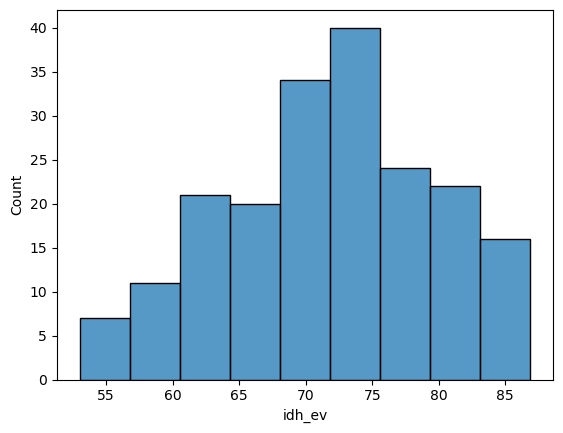

In [36]:
sns.histplot(x="idh_ev", data=idh_2022)

<Axes: xlabel='idh_ee', ylabel='Count'>

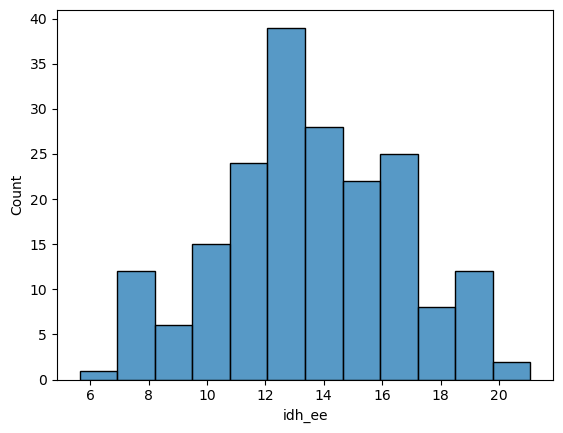

In [37]:
sns.histplot(x="idh_ee", data=idh_2022)

<Axes: xlabel='idh_me', ylabel='Count'>

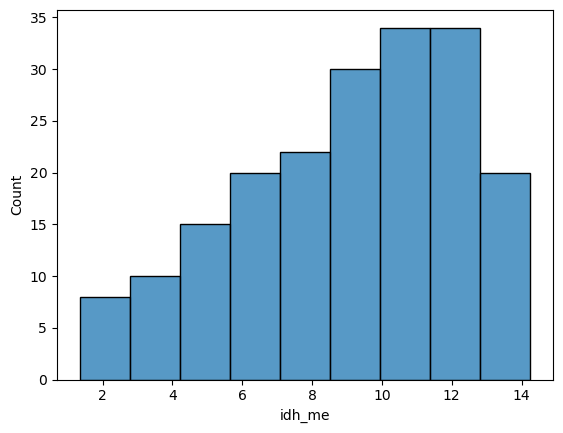

In [38]:
sns.histplot(x="idh_me", data=idh_2022)

<Axes: xlabel='idh_rpc', ylabel='Count'>

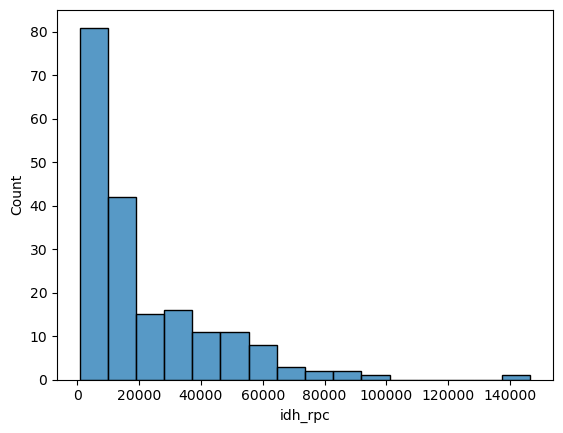

In [39]:
sns.histplot(x="idh_rpc", data=idh_2022)